In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# Rk4 algorithmzzzz
def rk4_(t, u, v, dt, f, g, omega, func):
    k1 = dt * f(u, v)z
    l1 = dt * g(t, u, v, omega, func)as

    k2 = dt * f(u + 0.5 * k1, v + 0.5 * l1)
    l2 = dt * g(t + 0.5 * dt, u + 0.5 * k1, v + 0.5 * l1, omega, func)

    k3 = dt * f(u + 0.5 * k2, v + 0.5 * l2)
    l3 = dt * g(t + 0.5 * dt, u + 0.5 * k2, v + 0.5 * l2, omega, func)

    k4 = dt * f(u + k3, v + l3)
    l4 = dt * g(t + dt, u + k3, v + l3, omega, func)

    u_next = u + (k1 + 2*k2 + 2*k3 + k4) / 6
    v_next = v + (l1 + 2*l2 + 2*l3 + l4) / 6

    return u_next, v_next

def rk4(n, u0, v0, dt, fu, fv, omega, func):

    t = [0]
    u = [u0]
    v = [v0]

    for i in range(n):

        u_, v_ = rk4_(t[-1], u[-1], v[-1], dt, fu, fv, omega, func)

        t.append(t[-1]+dt)
        u.append(u_)
        v.append(v_)

    return t, u, v

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

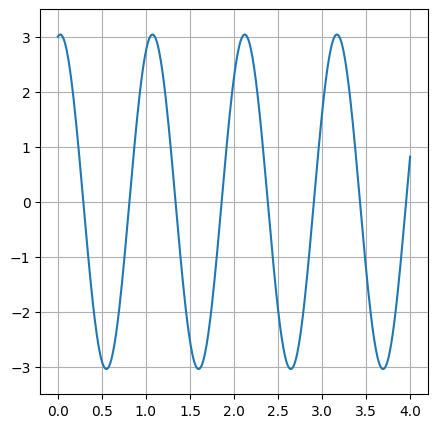

In [3]:
def func(t, u, v):
    return 0
    return -0.5*np.sin(t)

def fu(u, v):

    return v

def fv(t, u, v, omega, func):

    f = func(t, u, v)

    return f - omega**2 * u

dt = 1e-2
u0 = torch.linspace(-3, 3, 10)
v0 = torch.linspace(-3, 3, 10)
omega = torch.linspace(1, 6, 10)


data = []

for i in range(len(u0)):
    u0_ = u0[i]
    for j in range(len(v0)):
        v0_ = v0[j]
        for k in range(len(omega)):
            omega_ = omega[k]
            t, u, v = rk4(400, u0_, v0_, dt, fu, fv, omega_, func)
            t = torch.tensor(t, dtype=torch.float32)
            u = torch.tensor(u, dtype=torch.float32)
            v = torch.tensor(v, dtype=torch.float32)
            data.append([t, u, v, u0_, v0_, omega_])

            print(i*len(v0)*len(omega) + j*len(omega) + k)


plt.figure(figsize=(5,5))
plt.ylim(-3.5,3.5)
plt.plot(t, u)
plt.grid()
plt.show()


In [4]:
print(data[0][0][1])

tensor(0.0100)


In [5]:
X = []
Y = []


for j in range(len(data)):

    t = data[j][0]
    u = data[j][1]
    v = data[j][2]
    u0 = data[j][3]
    v0 = data[j][4]

    for i in range(3,len(u)-3):
        X.append([t[i], u[i-1], u[i-2], u[i-3], v[i-1], v[i-2], v[i-3], u0, v0])
        Y.append([u[i], v[i]])

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)

In [ ]:
X = []
Y = []
trajectory_ids = []

for j in range(len(data)):
    t = data[j][0]
    u = data[j][1]
    v = data[j][2]
    u0 = data[j][3]
    v0 = data[j][4]

    for i in range(3, len(u)-3):
        X.append([t[i], u[i-1], u[i-2], u[i-3], v[i-1], v[i-2], v[i-3], u0, v0])
        Y.append([u[i], v[i]])
        trajectory_ids.append(j)  # Índice da trajetória

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.float32)
trajectory_ids = torch.tensor(trajectory_ids, dtype=torch.long)

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print(f"Trajectory IDs shape: {trajectory_ids.shape}")

X shape: torch.Size([395000, 9])
Y shape: torch.Size([395000, 2])
Trajectory IDs shape: torch.Size([395000])


In [10]:
# Create dataset com índices de trajetória
from torch.utils.data import DataLoader, TensorDataset, Subset
import numpy as np

dataset = TensorDataset(X, Y, trajectory_ids)

# Split por trajetórias completas
unique_trajectories = torch.unique(trajectory_ids)
num_trajectories = len(unique_trajectories)

# Embaralhar trajetórias
shuffled_trajectories = torch.randperm(num_trajectories)

# Split 70/15/15
train_traj_count = int(0.7 * num_trajectories)
val_traj_count = int(0.15 * num_trajectories)

train_trajectories = shuffled_trajectories[:train_traj_count]
val_trajectories = shuffled_trajectories[train_traj_count:train_traj_count + val_traj_count]
test_trajectories = shuffled_trajectories[train_traj_count + val_traj_count:]

# Criar índices para cada split
train_indices = []
val_indices = []
test_indices = []

for i, traj_id in enumerate(trajectory_ids):
    if traj_id in train_trajectories:
        train_indices.append(i)
    elif traj_id in val_trajectories:
        val_indices.append(i)
    else:
        test_indices.append(i)

# Criar datasets
train_dataset = Subset(dataset, train_indices)
val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train trajectories: {len(train_trajectories)}")
print(f"Val trajectories: {len(val_trajectories)}")
print(f"Test trajectories: {len(test_trajectories)}")
print(f"Train samples: {len(train_dataset)}")
print(f"Val samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")

Train trajectories: 700
Val trajectories: 150
Test trajectories: 150
Train samples: 276500
Val samples: 59250
Test samples: 59250


In [14]:
def get_trajectory_data(trajectory_id, X, Y, trajectory_ids):
    """Retorna dados de uma trajetória específica"""
    mask = trajectory_ids == trajectory_id
    return X[mask], Y[mask]

# Exemplo de uso
traj_X, traj_Y = get_trajectory_data(200, X, Y, trajectory_ids)
print(f"Trajectory 200 - X shape: {traj_X.shape}, Y shape: {traj_Y.shape}")

Trajectory 200 - X shape: torch.Size([395, 9]), Y shape: torch.Size([395, 2])


In [7]:
print(X.shape)

torch.Size([395000, 9])


In [64]:
class ResidualNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(7+2, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 2)
        
    def forward(self, x):
        # Predizer apenas o incremento, não o valor absoluto
        x1 = F.tanh(self.fc1(x))
        x2 = F.relu(self.fc2(x1)) + x1  # Residual connection
        delta = self.fc3(x2)
        
        # Adicionar incremento aos valores anteriores
        u_prev = x[:, 1]  # u[i-1]
        v_prev = x[:, 4]  # v[i-1]
        
        return torch.stack([u_prev + delta[:, 0], v_prev + delta[:, 1]], dim=1)

In [82]:
# Create data loaders and split the dataset
from torch.utils.data import DataLoader, TensorDataset, random_split

dataset = TensorDataset(X, Y)

# Split 70% treino, 15% validação, 15% teste
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(
    dataset, [train_size, val_size, test_size]
)

# Criar dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train size: {len(train_dataset)}")
print(f"Validation size: {len(val_dataset)}")
print(f"Test size: {len(test_dataset)}")




Train size: 276500
Validation size: 59250
Test size: 59250


In [83]:
model = ResidualNN()
criterion = nn.MSELoss()

In [84]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
for epoch in range(500):
    # Treino
    model.train()
    train_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        opt.zero_grad()
        loss.backward()
        opt.step()
        train_loss += loss.item() * xb.size(0)
    
    train_loss /= len(train_loader.dataset)
    
    # Validação
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item() * xb.size(0)
    
    val_loss /= len(val_loader.dataset)
    
    if epoch % 1 == 0:
        print(f"Epoch {epoch}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")

Epoch 0, Train Loss: 0.008455, Val Loss: 0.000382
Epoch 50, Train Loss: 0.000002, Val Loss: 0.000003


KeyboardInterrupt: 

In [86]:
print(pred[0,1])

tensor(2.5531, grad_fn=<SelectBackward0>)


In [87]:
trajectory = 200

u = data[trajectory][1]
v = data[trajectory][2]
t = data[trajectory][0]
u0 = data[trajectory][3]
v0 = data[trajectory][4]

# Predict series starting from initial conditions
u_preds = [u[0], u[1], u[2]]  # Ordem temporal correta
v_preds = [v[0], v[1], v[2]]

X_preds = []
Y_preds = []

# Começar do tempo inicial com incremento correto
current_time = t[3]  # Próximo tempo após os 3 valores iniciais
print(t[3])

N = 390  # Número de predições a serem feitas

for i in range(N):  # Predizer mais pontos para visualizar melhor
    # Criar input com últimos 3 valores em ordem temporal correta
    input_ = [t[i+3], u_preds[-1], u_preds[-2], u_preds[-3], 
              v_preds[-1], v_preds[-2], v_preds[-3], u0, v0]
    
    input_tensor = torch.tensor(input_, dtype=torch.float32).unsqueeze(0)
    pred = model(input_tensor)
    
    # Adicionar no final (ordem temporal correta)
    u_preds.append(pred[0][0].item())
    v_preds.append(pred[0][1].item())
    
    X_preds.append(input_)
    Y_preds.append([u_preds[-1], v_preds[-1]])
    
    #current_time += dt  # Incremento consistente com o treinamento

X_preds = torch.tensor(X_preds, dtype=torch.float32)
Y_preds = torch.tensor(Y_preds, dtype=torch.float32)
u_preds = torch.tensor(u_preds, dtype=torch.float32)
v_preds = torch.tensor(v_preds, dtype=torch.float32)

tensor(0.0300)


In [88]:
print(X_preds[:,0])

tensor([0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800, 0.0900, 0.1000, 0.1100,
        0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700, 0.1800, 0.1900, 0.2000,
        0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600, 0.2700, 0.2800, 0.2900,
        0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500, 0.3600, 0.3700, 0.3800,
        0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400, 0.4500, 0.4600, 0.4700,
        0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300, 0.5400, 0.5500, 0.5600,
        0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200, 0.6300, 0.6400, 0.6500,
        0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100, 0.7200, 0.7300, 0.7400,
        0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000, 0.8100, 0.8200, 0.8300,
        0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900, 0.9000, 0.9100, 0.9200,
        0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800, 0.9900, 1.0000, 1.0100,
        1.0200, 1.0300, 1.0400, 1.0500, 1.0600, 1.0700, 1.0800, 1.0900, 1.1000,
        1.1100, 1.1200, 1.1300, 1.1400, 

In [89]:
print(X_preds.shape)
print(Y_preds.shape)
print(Y_preds[2])

torch.Size([390, 9])
torch.Size([390, 2])
tensor([-1.8149, -2.9149])


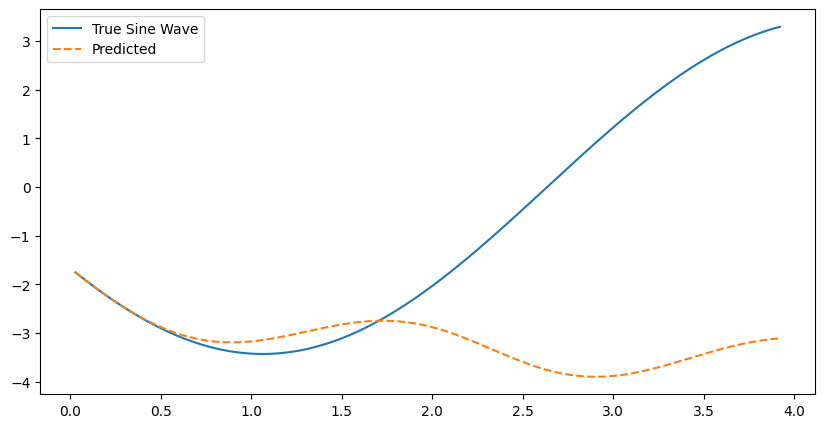

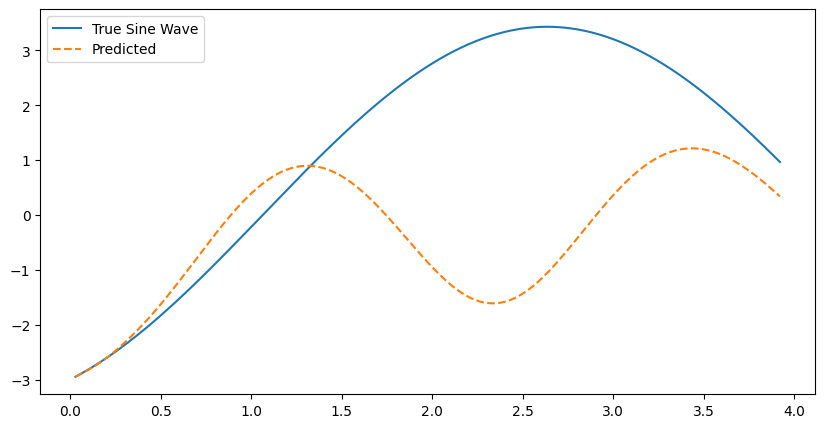

In [90]:
u = data[trajectory][1]
v = data[trajectory][2]
t = data[trajectory][0]

# Ajustar os índices para que os eixos x coincidam
start_idx = 3  # Começar do mesmo ponto das predições

# Plot results
plt.figure(figsize=(10,5))
plt.plot(t[start_idx:start_idx+N].numpy(), u[start_idx:start_idx+N].numpy(), label='True Sine Wave')
plt.plot(X_preds[:,0].numpy(), Y_preds[:,0].numpy(), label='Predicted', linestyle='--')
plt.legend()
plt.show()

# Plot results
plt.figure(figsize=(10,5))
plt.plot(t[start_idx:start_idx+N].numpy(), v[start_idx:start_idx+N].numpy(), label='True Sine Wave')
plt.plot(X_preds[:,0].numpy(), Y_preds[:,1].numpy(), label='Predicted', linestyle='--')
plt.legend()
plt.show()

In [91]:
print(X_preds[:,0])

tensor([0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800, 0.0900, 0.1000, 0.1100,
        0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700, 0.1800, 0.1900, 0.2000,
        0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600, 0.2700, 0.2800, 0.2900,
        0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500, 0.3600, 0.3700, 0.3800,
        0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400, 0.4500, 0.4600, 0.4700,
        0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300, 0.5400, 0.5500, 0.5600,
        0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200, 0.6300, 0.6400, 0.6500,
        0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100, 0.7200, 0.7300, 0.7400,
        0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000, 0.8100, 0.8200, 0.8300,
        0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900, 0.9000, 0.9100, 0.9200,
        0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800, 0.9900, 1.0000, 1.0100,
        1.0200, 1.0300, 1.0400, 1.0500, 1.0600, 1.0700, 1.0800, 1.0900, 1.1000,
        1.1100, 1.1200, 1.1300, 1.1400, 

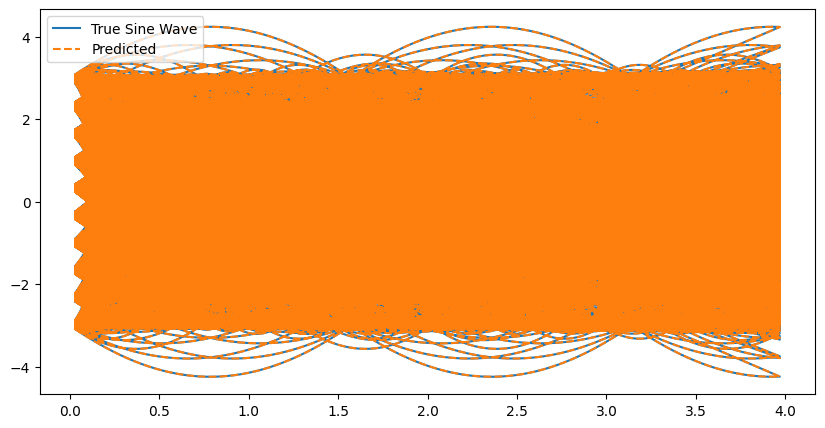

In [92]:

# Predict series starting from x[5]

pred = model(X)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(X[:,0], Y[:,0].numpy(), label='True Sine Wave')
plt.plot(X[:,0], pred[:,0].detach().numpy(), label='Predicted', linestyle='--')
plt.legend()
plt.show()